In [252]:
import numpy as np
import matplotlib.pyplot as plt

number_of_particle = 1
len_input = 1
initial_y = 10
final_y = -20
radius = 0.1
dt = 0.1


In [253]:
def initial_condition(N, L, IY):
    X0_data = np.random.uniform(-L/2,L/2,N)
    Y0_data = np.full(N,IY)
    Vx0_data = np.full(N,0)
    Vy0_data = np.full(N,0)
    return (np.stack((X0_data,Y0_data),axis=1),np.stack((Vx0_data,Vy0_data),axis=1))


In [254]:
def projectile_dynamic(pos, vel, dt):
    g = -10
    vel[:,1] = np.add(vel[:,1],g*dt)
    pos = np.add(pos,vel*dt)
    return pos , vel


In [255]:
def hit_sim(pos, vel, N, R, dt):
    hit_pos = np.round(pos)
    cal_step_1 = np.power(np.subtract(pos, hit_pos), 2)
    distance = np.sqrt(np.add(cal_step_1[:, 0], cal_step_1[:, 1]))
    for i in range(N):
        condition = (hit_pos[i][0] % 2 == 0 and hit_pos[i][1] % 2 == 0) or (
            hit_pos[i][0] % 2 == 1 and hit_pos[i][1] % 2 == 1)
        if distance[i] < 2*R and condition:
            Cos = (pos[i][0] - hit_pos[i][0])/(distance[i])
            Sin = (pos[i][1] - hit_pos[i][1])/(distance[i])
            Vx_final = (-((vel[i][0]*Cos)+(vel[i][1]*Sin))*Cos) - \
                ((-vel[i][0]*Sin)+(vel[i][1]*Cos)*Sin)
            Vy_final = (-((vel[i][0]*Cos)+(vel[i][1]*Sin))*Sin) + \
                ((-vel[i][0]*Sin)+(vel[i][1]*Cos)*Cos)
            pos[i][0] += Vx_final*dt
            pos[i][1] += Vy_final*dt
            vel[i][0] = Vx_final
            vel[i][1] = Vy_final
    return pos , vel


In [256]:
Position, Velocity = initial_condition(
    number_of_particle, len_input, initial_y)
data = []
while np.product(Position[:,1] <= final_y) == 0:
    Position, Velocity = projectile_dynamic(Position, Velocity, dt)
    Position, Velocity = hit_sim(
        Position, Velocity, number_of_particle, radius, dt)
    data.append(Position)


In [257]:
pos_arr = np.array(data)
pos_arr[2][0][0]


-0.023383125078394906

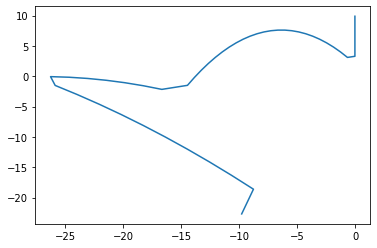

In [258]:
plt.plot(pos_arr[:, 0, 0], pos_arr[:, 0, 1])
